## The data is about three different county Stockholm , Uppsala , Västra Götalands , what young people persue after finsihing gynasieskola . Either contiunue studie or move in job market to look for jobs. 

In [84]:
import pandas as pd

# Read the data
df_gymnasieskola = pd.read_excel("../Uppgift_2/Gymnasieskola - Vad ungdomar gör efter gymnasieskolan 2013 Län.xlsx", sheet_name="Samtliga program")

# Rename the columns
df_column_rename = {
    df_gymnasieskola.columns[0]: "Län",
    df_gymnasieskola.columns[4]: "Etablerade 1 år efter examen",
    df_gymnasieskola.columns[5]: "Studerande 1 år efter examen",
    df_gymnasieskola.columns[6]: "Etablerade 3 år efter examen",
    df_gymnasieskola.columns[7]: "Studerande 3 år efter examen",
}

df_gymnasieskola_renamed = df_gymnasieskola.rename(columns=df_column_rename)

# Filter the rows for desired counties
df_wanted_data = df_gymnasieskola_renamed[df_gymnasieskola_renamed["Län"].isin(["Stockholms län", "Uppsala län", "Västra Götalands län", "Örebro län"])]

# Keep only the first occurrence of each unique county
df_wanted_data = df_wanted_data.groupby("Län").first().reset_index()

df_wanted_data = df_wanted_data.drop(['Unnamed: 1','Unnamed: 2','Unnamed: 3', 'Unnamed: 8', 'Unnamed: 9'], axis=1)

# Print the data
df_wanted_data

,Län,Etablerade 1 år efter examen,Studerande 1 år efter examen,Etablerade 3 år efter examen,Studerande 3 år efter examen
0,Stockholms län,21,47.9,30.7,55.4
1,Uppsala län,22.1,45.1,35.5,48.2
2,Västra Götalands län,21.5,44.2,35.6,49.3
3,Örebro län,21.9,40.4,37.9,42.7


### Lets plot the above data in bar chart form to see the how many continue study or go into job market after one and three years of study

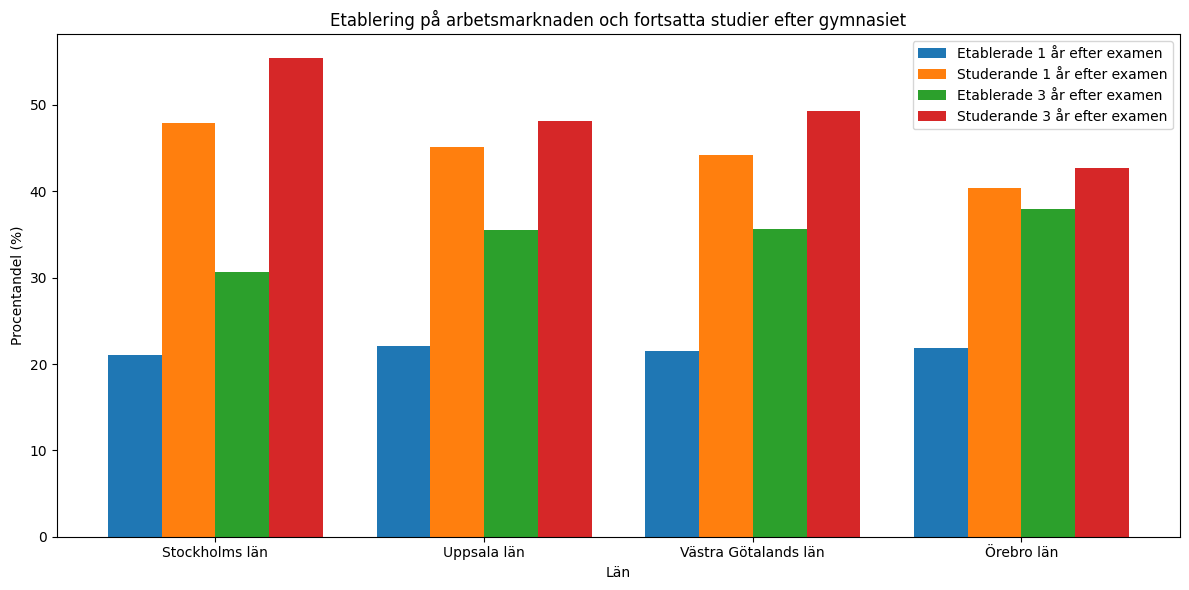

In [85]:
import matplotlib.pyplot as plt

# Data
counties = df_wanted_data["Län"]
data_columns = [
    "Etablerade 1 år efter examen",
    "Studerande 1 år efter examen",
    "Etablerade 3 år efter examen",
    "Studerande 3 år efter examen"
]
bar_width = 0.2
index = range(len(counties))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, column in enumerate(data_columns):
    plt.bar([x + i * bar_width for x in index], df_wanted_data[column], bar_width, label=column)

plt.xlabel('Län')
plt.ylabel('Procentandel (%)')
plt.title('Etablering på arbetsmarknaden och fortsatta studier efter gymnasiet')
plt.xticks([i + (len(data_columns) - 1) * bar_width / 2 for i in index], counties)
plt.legend()
plt.tight_layout()
plt.show()
